<a href="https://colab.research.google.com/github/efichr/test_ekpa/blob/main/final%20test_Tor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv"
df = pd.read_csv(url, low_memory=False)

# Αφαίρεση άχρηστων στηλών
df = df.drop(columns=["Src_IP", "Dst_IP", "Flow_Bytes/s", "Label-2"])

# Κρατάμε μόνο τις αριθμητικές στήλες + το Label-1
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.append("Label-1")

df = df[numeric_cols]

# Αντικατάσταση inf με NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Αφαίρεση NaN
df = df.dropna()

print("Τελικό μέγεθος df:", df.shape)
df.head()


Τελικό μέγεθος df: (68531, 79)


,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1
0,57158,443,6,229,1,1,0,0,0,0,...,20,0,0,0,0,0,0.000,0,0,Non-Tor
1,57159,443,6,407,1,1,0,0,0,0,...,20,0,0,0,0,0,0.000,0,0,Non-Tor
2,57160,443,6,431,1,1,0,0,0,0,...,20,0,0,0,0,0,0.000,0,0,Non-Tor
3,49134,443,6,359,1,1,0,0,0,0,...,20,0,0,0,0,0,0.000,0,0,Non-Tor
4,34697,19305,6,10778451,591,400,64530,6659,131,0,...,20,0,0,0,0,1437760000000000,3117718.131,1437760000000000,1437760000000000,Non-Tor


In [2]:
#ορισμος Χ,y και train/test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Label-1"])
y = df["Label-1"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Accuracy: 0.9707448748814475

Classification Report:
               precision    recall  f1-score   support

     Non-Tor       1.00      1.00      1.00      6177
      NonVPN       0.95      0.97      0.96      4548
         Tor       0.98      0.91      0.94       278
         VPN       0.94      0.92      0.93      2704

    accuracy                           0.97     13707
   macro avg       0.97      0.95      0.96     13707
weighted avg       0.97      0.97      0.97     13707



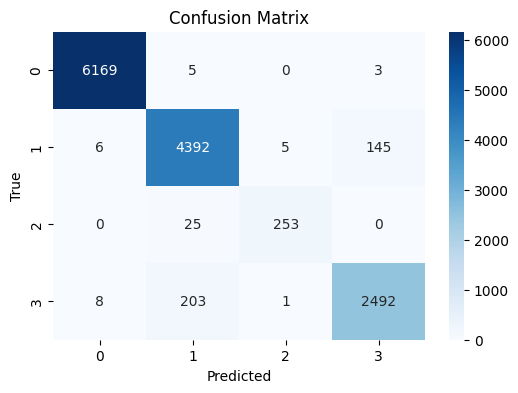

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

clf = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()